In [29]:
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
10,1800,3,82.0
14,2250,3,101.0
7,3300,4,155.0
8,1310,3,50.0
5,1170,2,38.0


In [3]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis='columns'))
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [4]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [10]:
np.ones(shape=(2))
# array([1., 1.])
#        w1  w2

a = np.array([1,2,3])
b = np.array([10,5,7])
a-b

np.mean(np.square(a-b))

35.333333333333336

In [6]:
# Doing transpose to make the rows into columns, making the sample data of area and bathroom in two spots
# Do dot product with the two weights on the two spots that hold the sample data

In [25]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    
    number_of_features = X.shape[1] # gives amount of features, because X.shape[0] = amount of samples. like x,y,z
    
    w = np.ones(shape=(number_of_features)) # Create array of ones with same amount of features
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        
        y_predicted = np.dot(w, scaled_X.T) + b # w1 * area + w2*bedrooms + bias
        
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true - y_predicted)) # MSE
        
        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 500)
w, b, cost


(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

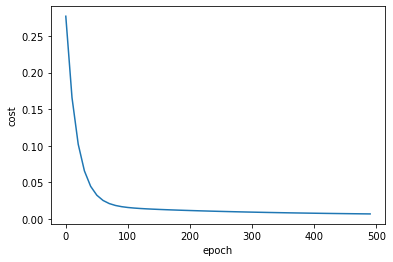

In [8]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list, cost_list)

In [13]:
sx.transform([[2600,4]]) # Scales data based on the highest value

array([[0.62068966, 0.75      ]])

In [27]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    
    scaled_price = w[0]*scaled_X[0] + w[1] * scaled_X[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0] # Doing [0][0] gets just the value rather than the brackets in the output

In [24]:
b

array([10,  5,  7])

In [28]:
predict(2600,4,w,b)

128.45484403267596

In [31]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    
    number_of_features = X.shape[1]
    
    # numpy arrays with 1 row and columns equal to number of features
    # In our case, number_of_features = 3 (area, bedroom, age)
    
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_index = random.randint(0, total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w, sample_x.T) + b
        
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list
        
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd


(array([0.7101922 , 0.67858492]), -0.23226347907712172, 0.004324429846338031)

In [32]:
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

In [43]:
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [46]:
arr1 = np.array([[1.1,1.1]])
arr1[0] = scaled_X[0]
arr1

array([[0.08827586, 0.25      ]])

In [51]:
s = np.ones((10,2))
s[0] = scaled_X[0]
s

array([[0.08827586, 0.25      ],
       [1.        , 1.        ],
       [1.        , 1.        ],
       [1.        , 1.        ],
       [1.        , 1.        ],
       [1.        , 1.        ],
       [1.        , 1.        ],
       [1.        , 1.        ],
       [1.        , 1.        ],
       [1.        , 1.        ]])

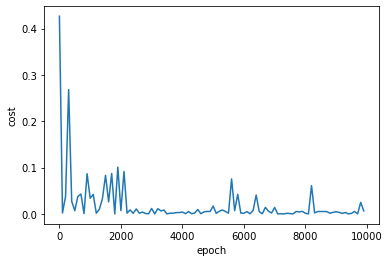

In [33]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_sgd, cost_list_sgd)

In [ ]:
def mini_batch_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    
    number_of_features = X.shape[1]
    
    # numpy arrays with 1 row and columns equal to number of features
    # In our case, number_of_features = 3 (area, bedroom, age)
    
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        
        sample_x_arr = np.ones((10,2))
        sample_y_arr = np.ones((10,2))
        
        for i in range(10):
            random_index = random.randint(0, total_samples-1)
            sample_x_arr[i] = X[random_index]
            sample_y_arr[i] = y_true[random_index]
            #sample_x = X[random_index]
            #sample_y = y_true[random_index]
            
        y_predicted = np.dot(w, sample_x_arr.T) + b
        
        w_grad = -(2/total_samples)*(sample_x_arr.T.dot(sample_y_arr-y_predicted))
        b_grad = -(2/total_samples)*np.sum(sample_y_arr-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(sample_y_arr - y_predicted)) # MSE
        
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list

In [52]:
w_mb, b_mb, cost_mb, cost_list_mb, epoch_list_mb = batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 500)
w_mb, b_mb, cost_mb

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)